#### Logistic regression is used in classification problems

In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [23]:
digits = load_digits()

In [24]:
print("Image data shape",digits.data.shape)
print("label shape",digits.target.shape)

Image data shape (1797, 64)
label shape (1797,)


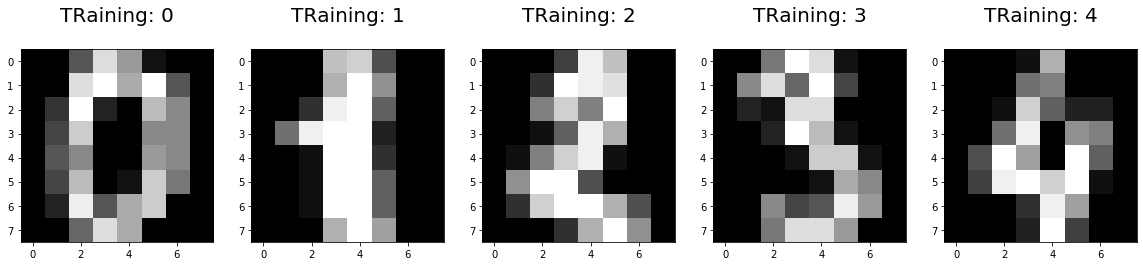

In [25]:
import numpy as np
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
 plt.subplot(1,5,index+1)
 plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
 plt.title('TRaining: %i\n' %label, fontsize = 20)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [30]:
print(x_train.shape)

(1383, 64)


In [31]:
print(y_train.shape)

(1383,)


In [32]:
print(x_test.shape)

(414, 64)


In [33]:
print(y_train.shape)

(1383,)


In [34]:
from sklearn.linear_model import LogisticRegression

In [39]:
logisticregr = LogisticRegression()
logisticregr.fit(x_train,y_train)

/home/praveen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
logisticregr.predict(x_test[0].reshape(1,-1))

array([4])

In [45]:
pred = logisticregr.predict(x_test)

In [48]:
score = logisticregr.score(x_test,y_test)
print(score)

0.9516908212560387


In [51]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,pred)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1, 'Accurary score:0.9516908212560387')

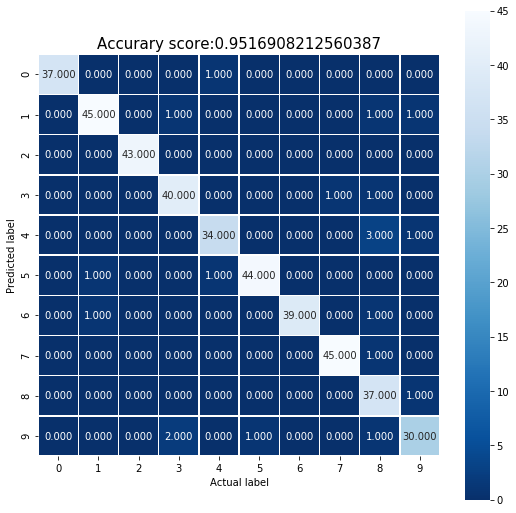

In [64]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True,fmt ='.3f',linewidths= .5,square =True,cmap ='Blues_r');
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
all_sample_title = 'Accurary score:{0}'.format(score)
plt.title(all_sample_title,size=15)

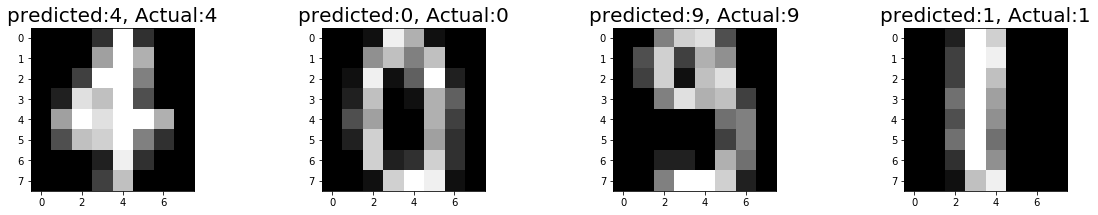

In [66]:
index = 0
classification=[]
for predict,actual in zip(pred,y_test):
    if predict==actual:
        classification.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotindex,wrong in enumerate(classification[0:4]):
    plt.subplot(1,4,plotindex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title('predicted:{}, Actual:{}'.format(pred[wrong],y_test[wrong]),fontsize=20)